### 복습

In [ ]:
어제까지 했던 것
Rel(d,q) = Similarity(Rep(d),Rep(q))
Rep(d),Rep(q) -> 같은 dimension 표현 => 그게 VS(vector space) MODEL(BoW 때문에 가능)
그러면 Dimension 을 어떻게? Dimension(Independent) = BoW에서 각 단어의 출현 확률(independent)
 => 그러니 dimemsion 을 VS model 에서 단어로 삼자!!
Rep(d) = {t1,t2,t3,...} 이것을 벡터공간에서 weight 로 표현하고
       = {w1,w2,w3,...}, weight = importance 로 삼자!
weight = Zipf law = TF-IDF(장점: 경험적으로 성능이 좋았음. 이유는 모름. 많은 사람들로부터 오랜 기간 검증됨
                           단점: 그게 단점)
Weight를 계산하기 위한 대표격의 TF-IDF => TF(t,d)*IDF(t) = freq(t)/maxfreq(t,d) * logN/df(t)
                                                    -> 정규화 k(1-k) 위 식은 이미 정규화 들어감
텍스트 마이닝에서 몇 개? 이런 건 취급 안함. 기본적으로 몇 억 이상. 그래서 메모리에 못 올리는 게 기본 가정. 항상.
따라서 memory 와 disc 를 쪼갬
memery(Dict)
disc(Posting); file 이었지만 Linked-list(Pointer;위치)로 했었음.
Posting(빈도;LinkedList;Dynamic) -> Posting(Weight;Sequential. 이게 훨씬 속도 빠름. 그런데 Dynamic 하게 추가는 안됨)
D, V, Dict => json 으로 변환하면 파일로 저장됨. 다른 곳에서 읽을 수 있고 동적으로 수정도 가능
Posting(byte. struct) => file -> 메모리를 매우 적게 씀 => space(memory에서의 space) 와 time complexity 를 매우 줄임.

이렇게 해서 각각의 문서 입장: 단어 축에서 벡터로 표현함. 즉 문서 단위에서 Embedding 을 수행한 것. => DTM
즉 문서 벡터를 가지고 비교하는 것. 쿼리 벡터도 문서 벡터와 같은 dimension 에 매핑하고, 그 서로 다른 두 벡터를 연산한 것.

단어 입장; 단어를 문서에 매핑하지는 않음. 단어를 문서들로 표현(벡터) => 단어를 문서로 Embedding 한 것과 같음 => TDM

Embedding 이란 -> 컴퓨터가 이해할 수 있는 형태의 벡터 표현으로 만들었냐는 것.
    
   t1 t2 t3 ..
d1 w1 w2 w3 .. => 문서 벡터 (유사한 문서들을 탐색)
d2 w1
d3 w1
   => 단어 벡터 (유사한 단어들을 탐색)

그렇다면, 문서를 => Profile, Content(유튜브, 책, 상품, 영상, ...), 문장(주제-본문, 표절) 등등으로 바꿔서 해줄 수 있음.
즉 임베딩을 해주면 할 수 있는 게 굉장히 많다는 것
단어 => 분포가설(어떤 단어는 항상 비슷한 표현을 갖는 다른 단어들과 같이 나타남; 문맥)
      => 두 단어의 분포가 비슷하면, 아마 의미가 유사할 것이다 라고 생각할 수 있음. N-gram(구,절), 연어, 공기어
이 유사한(Similarity) = VS model 에서의 measure( Dist, Angle )로 구함

Dist. => 벡터의 방향은 무시하고 거리만 잼. 기껏 벡터 만들었는데 방향 무시하고 점 사이의 거리만 잼. 그래서 이게 장단점이 있음.
      => 장점은, 잘 모르겠고
      => 단점은, 도는 범위가 전체 V Dimension 만큼 돌아서 extra words 가 있고 패널티가 있음
Angle => 장점은 벡터의 방향(축을 단어로 삼았기 때문에, 단어의 분포를 이야기 함 -> 문서에 있는 내용에 대한 분포를 축약한 것. 어떤 내용을 담고
                    있느냐를 경향성으로 판단할 수 있음.) 그리고 경향성: Norm이 들어가 있음.
      => 단점은, 가정의 단점임. 가정 또는 가설의 단점. independent 하다고 했는데 실제 그렇지 않다!
        
[Dist. - Euclidean]
sqrt(tㅌV sum((w_t,q - w_t,d)**2))

[Angle - Consine]   |a| 는 a의 길이
a ip(내적) b = |a||b|cos theta
cos theta = a ip b / |a||b|
          = tㅌq sum(w_t,q * w_t,d)
         ------------------------------
               euc(q) * euc(d)  => Indexing; weight 만들 때 구할 수 있음; 계산할 때 효율적으로 빨리 가능
            => 생략가능(고정된 상수값의 의미를 가져서)

### 앞으로

In [ ]:
오전수업은 NN 관련해서 할 것.
Regression(Linear/Logistic) -> Gradient(Optimizier: (S) Gradient Descent)
Gradient 를 그냥 알 수는 없음. Taylor series(테일러 급수) => 여기서 Gradient(Optimizier: (S) Gradient Descent) 뽑을 것
Gradient 를 알아야지 (A)NN - Single layer Perceptron 을 알 것. 이것을 알려면 Activate func 을 알아야 함.
Activation func 에는 Logistic, tanh 등이 있음.
왜 많이 쓰이는지 알려면 Loss func. -> 우리가 찾아낸 아웃풋에 대한. Binomial, Multinomial, Softmax, Hidden
loss func 을 어떻게 optimize 할까 방법이 다 달라짐 =>           bce        ce      + (tanh)   Chainrule
Preprocessing => SPTokenizer
Encoding => NNLM, SVD, W2V(CBOW, Skip-gram)=> OOV문제, FastText
            ELMo, ..., => LM 관점(어휘); 어휘의 (중의성)의미를 해결하기 위한 관점. 어떻게 잘 해결?
NN-based Model ? 좋은 성능 -> 문서나 문장 단위의 encoding
여기까지 알면 그 때부터는 hidden's' => Deep NN
시계열 모델 Time series(RNN, LSTM/GRU, Attention); 속도 느림
                   => Seq2Seq(Encoder/Decoder)
Transformer(Attention) 가 극복; Encoder(Self-attention/Multihead->CNN 필터 관점) / Decoder(기존 attention 메커니즘)
요새는 다 Transformer 를 붙혀야 성능이 좋음. 또 파라미터 수도 많아야 성능이 좋음.
전이학습 Transfer Learning: Pre-trained Model + layer(학습: fine tuning)
위에서부터 다 알아야 함.

### 수업

In [ ]:
어제는 벡터들을 가지고 similarity 를 relevance 로 측정하겠다고 했음.
우리는 konlpy 의 코퍼스 일부를 가지고 했음.
우리 데이터로 불러와서 preprocessing 과정 다 거쳐서 검색엔진에 넣어보는 작업을 해볼 것.

In [7]:
from konlpy.corpus import kobill
from collections import Counter
from struct import pack, unpack

In [8]:
from math import log

tf1 = lambda freq: 1 if freq >0 else 0    # binary
tf2 = lambda freq: freq                   # raw count
tf3 = lambda freq, sumfreq: freq/sumfreq  # term freq
tf4 = lambda freq: log(1+freq, 10)            # log normalization
tf5 = lambda freq, maxfreq: tf6(.5,freq,maxfreq)           # double normalization .5
tf6 = lambda k, freq, maxfreq: k + (1-k) * (freq/maxfreq)  # double normalization K

idf1 = lambda:1
idf2 = lambda df, N:log(N/df) 
idf3 = lambda df, N:log(N/(1+df))+1
idf4 = lambda df, maxdf:log(maxdf/(1+df))
idf5 = lambda df, N:log((N-df)/df)

In [18]:
C = list()
V = list()  # 전체 단어 리스트
TDM = dict()

#open('posting.dat', 'wb').close()  # 이미 있는 것 열었다가 끄기

# 1. Collection
for file in kobill.fileids():
    C.append({'path':file, 'maxfreq':0, 'length':0})  # 여기에 가중치를 위한 maxfreq, measure 를 위한 length 정보 기입
    
# 2. each Documnet => 분산처리
for d in C:
    i = C.index(d)
    localTDM = Counter(kobill.open(d['path']).read().split())  # term : freq
    C[i]['maxfreq'] = max(localTDM.values())
    
    # 3. Local -> Global
    for t,f in localTDM.items():
        if t not in V:
            V.append(t)
            
        j = V.index(t)
        
        if j in TDM.keys():  # 이미 다른 문서에서 한번이라도 나왔다는 것
            TDM[j]['docfreq'] += 1
            info = (i,f,TDM[j]['pos']) #

        else:
            TDM[j] = {'docfreq':1, 'pos':-1} # 이 부분이 바뀜. docfreq 가 df
            info = (i,f,-1) # 문서번호, 단어빈도, 위치; -1 을 맨 처음에 나온 것에 줌으로써 맨 마지막으로 포인터가 도착하는 곳 표현
        
        fp = open('posting.dat', 'ab')
        pos = fp.tell()
        fp.write(pack('iii', *info))
        fp.close()

        TDM[j]['pos'] = pos #

In [4]:
TDM

{0: {'docfreq': 1, 'pos': 0},
 1: {'docfreq': 8, 'pos': 46368},
 2: {'docfreq': 2, 'pos': 14388},
 3: {'docfreq': 8, 'pos': 46392},
 4: {'docfreq': 10, 'pos': 57252},
 5: {'docfreq': 10, 'pos': 56736},
 6: {'docfreq': 8, 'pos': 46428},
 7: {'docfreq': 8, 'pos': 46440},
 8: {'docfreq': 8, 'pos': 46452},
 9: {'docfreq': 1, 'pos': 108},
 10: {'docfreq': 8, 'pos': 46476},
 11: {'docfreq': 10, 'pos': 55344},
 12: {'docfreq': 10, 'pos': 55356},
 13: {'docfreq': 10, 'pos': 55368},
 14: {'docfreq': 6, 'pos': 55380},
 15: {'docfreq': 8, 'pos': 46536},
 16: {'docfreq': 10, 'pos': 55440},
 17: {'docfreq': 2, 'pos': 14568},
 18: {'docfreq': 1, 'pos': 216},
 19: {'docfreq': 1, 'pos': 228},
 20: {'docfreq': 1, 'pos': 240},
 21: {'docfreq': 1, 'pos': 252},
 22: {'docfreq': 1, 'pos': 264},
 23: {'docfreq': 1, 'pos': 276},
 24: {'docfreq': 1, 'pos': 288},
 25: {'docfreq': 1, 'pos': 300},
 26: {'docfreq': 10, 'pos': 55476},
 27: {'docfreq': 1, 'pos': 324},
 28: {'docfreq': 1, 'pos': 336},
 29: {'docfreq

In [19]:
WDM = dict()

# open('weights.dat', 'wb').close()

for t, tinfo in TDM.items():  # TDM -> Dictionary(term), Posting(doc num, freq, next location)
    pos = tinfo['pos']
    df = tinfo['docfreq']

    with open('posting.dat', 'rb') as fp:
        fp2 = open('weights.dat', 'ab')
        wpos = fp2.tell()  # 현재위치
        
        while pos != -1:
            fp.seek(pos)  # pos 로 이동
            info = unpack('iii', fp.read(12))  # fp 안에는 (문서번호, 단어빈도, 위치)
            pos = info[-1]
            
            w = tf5(info[1], C[info[0]]['maxfreq'])*\
            idf2(df,len(C))
            winfo = (info[0], w)
            fp2.write(pack('if',*winfo))
            
            C[info[0]]['length'] += w**2 # ? => 문서 벡터 길이. sqrt 는 나중에
            
        fp2.close()
        
        WDM[t] = {'pos':wpos, 'df':df}

In [20]:
WDM
# 보면 df * byte 로 규칙적으로 배치되어 있음.
# 그래서 포인터를 이용하지 않아도 더 빠르게 찾아갈 수 있다는 것.

{0: {'pos': 0, 'df': 1},
 1: {'pos': 8, 'df': 8},
 2: {'pos': 72, 'df': 2},
 3: {'pos': 88, 'df': 8},
 4: {'pos': 152, 'df': 10},
 5: {'pos': 232, 'df': 10},
 6: {'pos': 312, 'df': 8},
 7: {'pos': 376, 'df': 8},
 8: {'pos': 440, 'df': 8},
 9: {'pos': 504, 'df': 1},
 10: {'pos': 512, 'df': 8},
 11: {'pos': 576, 'df': 10},
 12: {'pos': 656, 'df': 10},
 13: {'pos': 736, 'df': 10},
 14: {'pos': 816, 'df': 6},
 15: {'pos': 864, 'df': 8},
 16: {'pos': 928, 'df': 10},
 17: {'pos': 1008, 'df': 2},
 18: {'pos': 1024, 'df': 1},
 19: {'pos': 1032, 'df': 1},
 20: {'pos': 1040, 'df': 1},
 21: {'pos': 1048, 'df': 1},
 22: {'pos': 1056, 'df': 1},
 23: {'pos': 1064, 'df': 1},
 24: {'pos': 1072, 'df': 1},
 25: {'pos': 1080, 'df': 1},
 26: {'pos': 1088, 'df': 10},
 27: {'pos': 1168, 'df': 1},
 28: {'pos': 1176, 'df': 1},
 29: {'pos': 1184, 'df': 1},
 30: {'pos': 1192, 'df': 1},
 31: {'pos': 1200, 'df': 1},
 32: {'pos': 1208, 'df': 1},
 33: {'pos': 1216, 'df': 1},
 34: {'pos': 1224, 'df': 2},
 35: {'pos'

In [7]:
for t, info in WDM.items():
    with open('weights.dat', 'rb') as fp:   # weights 파일에는 (문서번호, 가중치) 정보
        for pos in range(info['df']):
                fp.seek(info['pos']+(8*pos))
                w = unpack('if', fp.read(8))
                print(t, w[0], w[1])  # 단어, 문서, 가중치

0 0 1.2664217948913574
1 8 0.11900989711284637
1 7 0.12751060724258423
1 6 0.12918837368488312
1 5 0.12918837368488312
1 4 0.12918837368488312
1 3 0.14876236021518707
1 2 0.13016706705093384
1 0 0.11900989711284637
2 2 0.8717788457870483
2 0 0.8315429091453552
3 8 0.11529083549976349
3 7 0.11688471585512161
3 6 0.11744397133588791
3 5 0.11744397133588791
3 4 0.11744397133588791
3 3 0.13016706705093384
3 2 0.12086942046880722
3 0 0.11529083549976349
4 9 0.0
4 8 0.0
4 7 0.0
4 6 0.0
4 5 0.0
4 4 0.0
4 3 0.0
4 2 0.0
4 1 0.0
4 0 0.0
5 9 0.0
5 8 0.0
5 7 0.0
5 6 0.0
5 5 0.0
5 4 0.0
5 3 0.0
5 2 0.0
5 1 0.0
5 0 0.0
6 8 0.12272895127534866
6 7 0.12219765782356262
6 6 0.12331617623567581
6 5 0.12331617623567581
6 4 0.12331617623567581
6 3 0.14876236021518707
6 2 0.13016706705093384
6 0 0.11900989711284637
7 8 0.11529083549976349
7 7 0.11688471585512161
7 6 0.11744397133588791
7 5 0.11744397133588791
7 4 0.11744397133588791
7 3 0.13016706705093384
7 2 0.12086942046880722
7 0 0.11529083549976349
8 8

In [19]:
V[4], V[5], V[11], V[12], V[13]  # 가중치가 0 인 얘네들은 모든 문서에 다 있던 것. 그래서 가중치가 날라감
# 얘네가 빈도의 역순으로 나열했을 때 가장 먼저 나왔을 것.

(')', '의', ':', '2010.', '11.')

In [ ]:
# Dist, Angle 재보자!

In [20]:
C  # maxfreq 와 length 있음

[{'path': '1809896.txt', 'maxfreq': 30, 'length': 904.8956208520719},
 {'path': '1809897.txt', 'maxfreq': 39, 'length': 361.15687905958765},
 {'path': '1809895.txt', 'maxfreq': 12, 'length': 244.93294599637258},
 {'path': '1809894.txt', 'maxfreq': 6, 'length': 185.50522748976124},
 {'path': '1809890.txt', 'maxfreq': 19, 'length': 139.05776871700942},
 {'path': '1809891.txt', 'maxfreq': 19, 'length': 136.05603758633873},
 {'path': '1809893.txt', 'maxfreq': 19, 'length': 195.89277969328438},
 {'path': '1809892.txt', 'maxfreq': 21, 'length': 253.43020875261035},
 {'path': '1809899.txt', 'maxfreq': 30, 'length': 812.7729912362322},
 {'path': '1809898.txt', 'maxfreq': 46, 'length': 361.16523194157327}]

In [21]:
from math import sqrt

In [ ]:
# Distance -> V dimension 에서 도는 것
# 두 벡터 사이의 길이 

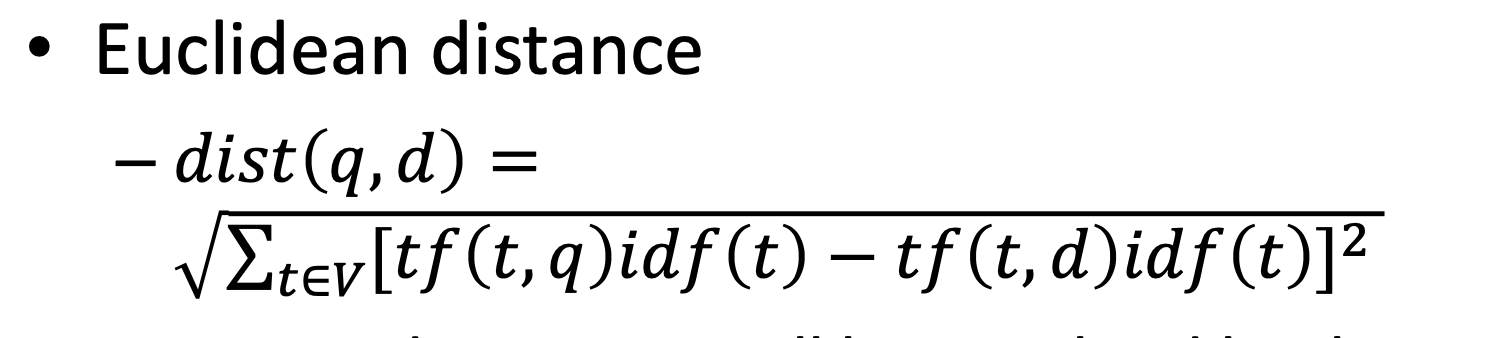

In [22]:
result = dict()
# 먼저 우리가 가진 문서로 Query를 줄 것 -> 그러면 거리가 0이 나와야 할 것.(자기끼리 뻈으니까)
Q = kobill.open(C[0]['path']).read()
Q_tokenize = Counter(Q.split())
Q_maxfreq = max(Q_tokenize.values())
QWM = dict()

for t,f in Q_tokenize.items():
    w = tf5(f, Q_maxfreq)*idf2(TDM[V.index(t)]['docfreq'],len(C))
    QWM[V.index(t)] = w  # Query 에 대한 벡터를 만드는데 V dimension 에서의 weight 값 다 구한 것.

# el sum [(e1.v1 - e1.v2)**2], V
#            w1  -  w2[1]
    
for j in range(len(V)):
    w1 = QWM[j] if j in QWM.keys() else 0
    info = WDM[j]  # {pos:posting파일 위치, df:posting몇번탐색}
    with open('weights.dat', 'rb') as fp:  # weights 파일에는 (문서번호, 가중치) 정보
            for pos in range(info['df']):
                    fp.seek(info['pos']+(8*pos))  # 8바이트씩 포인터 위치를 이동시킨 것.
                    w2 = unpack('if', fp.read(8)) # pos가 처음에 0일 것이니까.
                    # w2 = [숫자(몇번문서), 실수(그때의 가중치)]

                    if w2[0] not in result.keys():  # 키에러 피할려고 한 것
                        result[w2[0]] = (w1 - w2[1])**2  # 문서와 그 쿼리와의 거리를 주는 것.
                    else:
                        result[w2[0]] += (w1 - w2[1])**2  # 각각의 문서의 번호에 가중치의 차이의 제곱의 합이 들어있음.
                        # 그게 V dimension 만큼 있을 것.

result = {i:sqrt(ws) for i, ws in result.items()}
sorted(result.items(), key=lambda r:r[-1], reverse=False) # 전체 문서목록 가져올 것

# 0번 문서를 쿼리로 삼았고 아래 결과보면 0번째와의 거리가 0임.

[(0, 1.01563146115579e-06),
 (5, 11.400269205606014),
 (4, 11.52620024734067),
 (3, 13.072557229131215),
 (6, 13.735969052148276),
 (2, 15.125594899524478),
 (7, 15.52144520959886),
 (1, 18.711489227635557),
 (9, 18.786738793925064),
 (8, 27.597854105829114)]

In [24]:
QWM

{0: 1.2664218011467254,
 1: 0.11900989403424521,
 2: 0.8315429214242852,
 3: 0.11529083484567505,
 4: 0.0,
 5: 0.0,
 6: 0.11900989403424521,
 7: 0.11529083484567505,
 8: 0.11900989403424521,
 9: 1.1896689647135905,
 10: 0.11529083484567505,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.28095409307129493,
 15: 0.11529083484567505,
 16: 0.0,
 17: 0.8315429214242852,
 18: 1.1896689647135905,
 19: 1.1896689647135905,
 20: 1.1896689647135905,
 21: 1.1896689647135905,
 22: 1.1896689647135905,
 23: 1.1896689647135905,
 24: 1.1896689647135905,
 25: 1.1896689647135905,
 26: 0.0,
 27: 1.1896689647135905,
 28: 1.1896689647135905,
 29: 1.1896689647135905,
 30: 1.1896689647135905,
 31: 1.2664218011467254,
 32: 1.2280453829301579,
 33: 1.1896689647135905,
 34: 0.8851908518387552,
 35: 1.1896689647135905,
 36: 1.1896689647135905,
 37: 1.1896689647135905,
 38: 1.1896689647135905,
 39: 1.1896689647135905,
 40: 1.1896689647135905,
 41: 0.3581260432893051,
 42: 1.1896689647135905,
 43: 1.1896689647135905,
 44: 0.

In [26]:
from nltk.tokenize import sent_tokenize
Q = sent_tokenize(kobill.open(C[2]['path']).read())[5]
C[2]['path'], C[2]['length'] # 이 문서의 5번째 문장을 쿼리로 삼음. 따라서 이 문서가 가장 가깝다고 나와야 함. Distance 에서.

('1809895.txt', 244.93294599637258)

In [27]:
sent_tokenize(kobill.open(C[2]['path']).read())[5]

'이에 서면에 의한 계약을 따르지 않을 경우 벌금에 처하도록 하고, \n\n손해배상에 있어서 입증책임을 원사업자에게 전환시키며, 법원이 추정\n\n에 의한 손해액의 인정을 할 수 있게 하여 수급사업자가 소송을 용의\n\n- 1 -\n\n\x0c- 2 -\n\n하게 진행할 수 있도록 함으로써 비대칭적인 교섭력과 정보력의 차이\n\n를 보완하고, 나아가 공정한 하도급거래 질서가 유지․발전 되도록 하\n\n려는 것임(안 제35조 및 제36조 신설).'

In [28]:
result = dict()
Q = sent_tokenize(kobill.open(C[2]['path']).read())[5]
Q_tokenize = Counter(Q.split())
Q_maxfreq = max(Q_tokenize.values())
QWM = dict()

for t,f in Q_tokenize.items():
    w = tf5(f, Q_maxfreq)*idf2(TDM[V.index(t)]['docfreq'],len(C))
    QWM[V.index(t)] = w  # Query 에 대한 벡터를 만드는데 V dimension 에서의 weight 값 다 구한 것.
    
for j in range(len(V)):
    w1 = QWM[j] if j in QWM.keys() else 0
    info = WDM[j]  # {df:posting몇번탐색, pos:posting파일 위치}
    with open('weights.dat', 'rb') as fp:
            for pos in range(info['df']):
                    fp.seek(info['pos']+(8*pos))  # 8바이트씩 포인터 위치를 이동시킨 것. int, float 가 4바이트 씩이니까.
                    w2 = unpack('if', fp.read(8)) # pos가 처음에 0일 것이니까.
                    # w2 = [숫자(몇번문서), 실수(그때의 가중치)]

                    if w2[0] not in result.keys():  # 키에러 피할려고 한 것
                        result[w2[0]] = (w1 - w2[1])**2
                    else:
                        result[w2[0]] += (w1 - w2[1])**2  # 각각의 문서에 번호에 가중치의 차이의 제곱의 합이 들어있음.
                        # 그게 V dimension 만큼 있을 것.

result = {i:sqrt(ws) for i, ws in result.items()}
sorted(result.items(), key=lambda r:r[-1], reverse=False) # 전체 문서목록 가져올 것

# 인덱스가 2인 애가 거리가 가장 가까워야 우리 상식에 맞음. 그런데 아래 결과를 보면 그렇게 안 생겼음.
# distance 로 했을 때 그렇지 않음

[(5, 11.643921247712454),
 (4, 11.772112524054746),
 (3, 13.608834831194235),
 (2, 13.803977872380601),
 (6, 13.940996767707713),
 (7, 15.89362374348744),
 (9, 18.997834050522933),
 (1, 19.00096224192211),
 (8, 28.432442047952915),
 (0, 30.022246905634788)]

In [29]:
len(kobill.open(C[5]['path']).read().split()),\
len(set(kobill.open(C[5]['path']).read().split())), C[5]['path'], C[5]['length']
# 검색 결과 중 최상위. 1번으로 나온.
# C[5] 는 원래 검색 대상(C[2])보다 단어 수가 많은데도 위에 있음.
# 왜냐하면 weight sum 이기 때문. C[5]가 흔한 단어로 구성되어 있으면 weight가 대부분 0이었을 것.
# 이 벡터를 구성하고 있는 weight 값에 절대적인 영향을 받는 것.
# 오히려 length 가 작다는 것은 가중치가 작다는 것. TF-IDF 값이 낮았다는 것.
# IDF 에 의해서 좌지우지 되는데, 이를 따라 여러 단어에서 나온 흔한 단어들로 이 문서가 구성되어 있었다는 것.
# weight 를 TF-IDF 말고 다른 걸 했으면 결과가 또 다를 것.

(834, 537, '1809891.txt', 136.05603758633873)

In [30]:
len(kobill.open(C[2]['path']).read().split()),\
len(set(kobill.open(C[2]['path']).read().split())), C[2]['length']
# 이게 검색질의(쿼리)로 사용된 문장이 있는 문서
# C[2]가 더 의미있는 단어들을 들고 있는 것. 단어수가 적은데 웨이트가 큼

(394, 256, 244.93294599637258)

In [32]:
len(kobill.open(C[0]['path']).read().split()),\
len(set(kobill.open(C[0]['path']).read().split()))
# 검색 결과 중 꼴등
# 단어가 많아서 꼴등. 특히 unique 한 단어의 수가 많음. 그것은
# V의 개수 만큼 돌 때 w2 에는 계속 값이 있어서 계속 값이 누적되었을 것. 그래서 결과가 안 좋은 것.
# 그러면 8번도 아마 길 것.

# 여기서 알 수 있는 것이,
# extra word 때문에 패널티를 받는다는 것을 알 수 있다. 내용과 상관없이 extra word 때문에 거리값이 커진다!
# 즉 우리가 패널티에 관한 걸 체감할 수 있었다!

(1939, 797)

In [33]:
len(kobill.open(C[8]['path']).read().split()),\
len(set(kobill.open(C[8]['path']).read().split()))

(1677, 745)

In [ ]:
# 이번에는 Angle!!

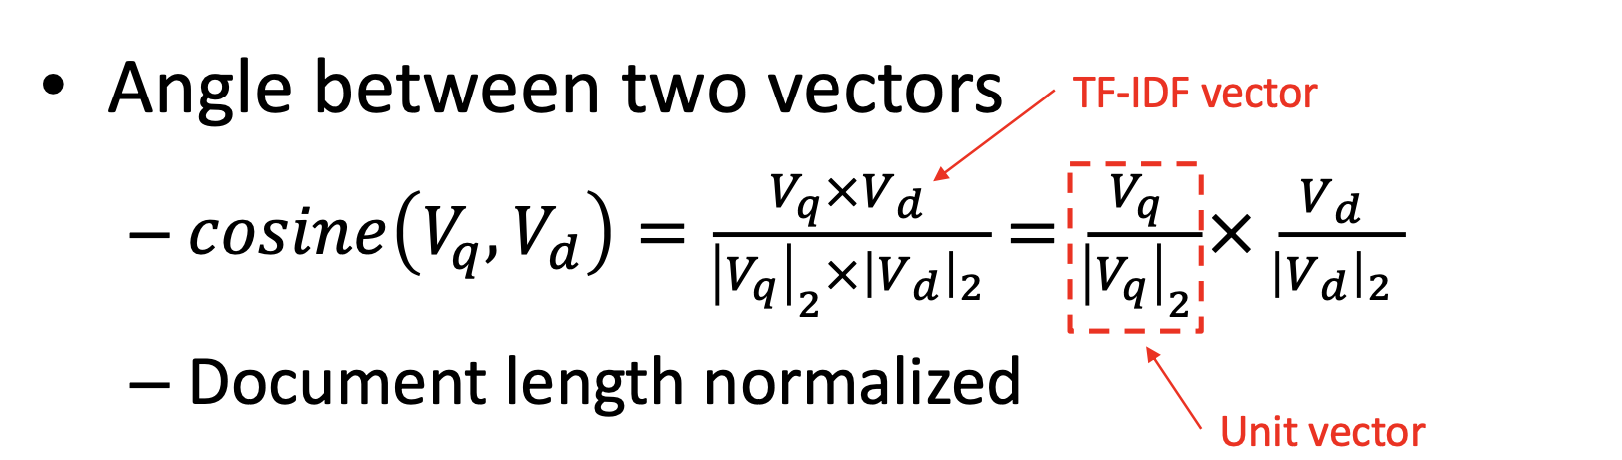

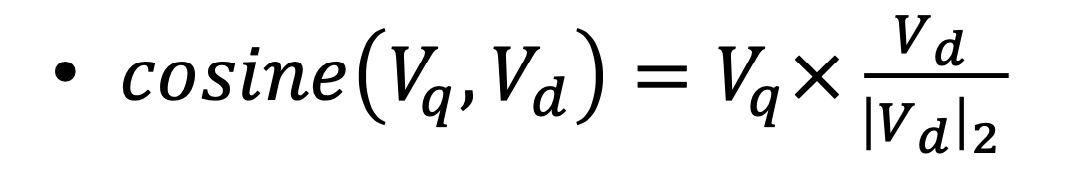

In [34]:
result = dict()
Q = kobill.open(C[0]['path']).read()
Q_tokenize = Counter(Q.split())
Q_maxfreq = max(Q_tokenize.values())
QWM = dict()
Q_length = 0

for t,f in Q_tokenize.items():
    w = tf5(f, Q_maxfreq)*idf2(TDM[V.index(t)]['docfreq'],len(C))
    QWM[V.index(t)] = w  # Query 에 대한 벡터를 만드는데 V dimension 에서의 weight 값 다 구한 것.
    Q_length += w**2  # 나중에는 상수취급해서 없애도 됨.

    
for j, w1 in QWM.items():  # 전체 V dimensions 를 볼 필요 없음. 어디 하나가 0 이면 결과가 0되는 내적을 할 것이기 때문.
    info = WDM[j]  # {df:posting몇번탐색, pos:posting파일 위치}. 쿼리 속 단어가 doc 마다 얼만큼의 웨이트를 가지는 지 가져올 것
    with open('weights.dat', 'rb') as fp:
            for pos in range(info['df']):
                    fp.seek(info['pos']+(8*pos))  # 8바이트씩 포인터 위치를 이동시킨 것. int, float 가 4바이트 씩이니까.
                    w2 = unpack('if', fp.read(8)) # pos가 처음에 0일 것이니까.
                    # w2 = [숫자(몇번문서), 실수(그때의 가중치)]

                    if w2[0] not in result.keys():  # 키에러 피할려고 한 것
                        result[w2[0]] = w1*w2[1]
                    else:
                        result[w2[0]] += w1*w2[1]  # 내적

result = {i:ws/(sqrt(Q_length)*sqrt(C[i]['length'])) for i, ws in result.items()}
sorted(result.items(), key=lambda r:r[-1], reverse=True) # 전체 문서목록 가져올 것

# 문서번호 0이 제일 높게 나옴. 0번 문서를 쿼리로 넣었기 때문

[(0, 1.0000000108721785),
 (8, 0.06103018886059733),
 (2, 0.03405966501042488),
 (3, 0.03321231804358889),
 (7, 0.027066046683552922),
 (1, 0.019953035444347858),
 (4, 0.018977147359332782),
 (5, 0.018662258599328622),
 (6, 0.01775012697464156),
 (9, 0.015027070384113989)]

In [35]:
result = dict()
Q = sent_tokenize(kobill.open(C[2]['path']).read())[5]
Q_tokenize = Counter(Q.split())
Q_maxfreq = max(Q_tokenize.values())
QWM = dict()
Q_length = 0

for t,f in Q_tokenize.items():
    w = tf5(f, Q_maxfreq)*idf2(TDM[V.index(t)]['docfreq'],len(C))
    QWM[V.index(t)] = w  # Query 에 대한 벡터를 만드는데 V dimension 에서의 weight 값 다 구한 것.
    Q_length += w**2

    
for j, w1 in QWM.items():  # 전체 V dimensions 를 볼 필요 없음. 내적할 것이기 때문. 어디 하나가 0 이면 결과가 0됨
    info = WDM[j]  # {df:posting몇번탐색, pos:posting파일 위치}. 쿼리 속 단어가 doc 마다 얼만큼의 웨이트를 가지는 지 가져올 것
    with open('weights.dat', 'rb') as fp:
            for pos in range(info['df']):
                    fp.seek(info['pos']+(8*pos))  # 8바이트씩 포인터 위치를 이동시킨 것. int, float 가 4바이트 씩이니까.
                    w2 = unpack('if', fp.read(8)) # pos가 처음에 0일 것이니까.
                    # w2 = [숫자(몇번문서), 실수(그때의 가중치)]

                    if w2[0] not in result.keys():  # 키에러 피할려고 한 것
                        result[w2[0]] = w1*w2[1]
                    else:
                        result[w2[0]] += w1*w2[1]  # 내적

result = {i:ws/(sqrt(Q_length)*sqrt(C[i]['length'])) for i, ws in result.items()}
sorted(result.items(), key=lambda r:r[-1], reverse=True) # 전체 문서목록 가져올 것

# 인덱스 2인 애가 제일 높게 나옴. 아까 distance 랑 다른 결과. 더 좋다는 것.

[(2, 0.4752758425431671),
 (8, 0.023058944349537053),
 (0, 0.017172913519225157),
 (6, 0.015379574349498088),
 (7, 0.007251130260983224),
 (5, 0.005495394588749922),
 (4, 0.00543575861496965),
 (3, 0.0028661968426988735),
 (9, 0.001962284215541149),
 (1, 0.0009635191757535786)]

In [36]:
result = dict()
Q = sent_tokenize(kobill.open(C[2]['path']).read())[5]
Q_tokenize = Counter(Q.split())
Q_maxfreq = max(Q_tokenize.values())
QWM = dict()
Q_length = 0

for t,f in Q_tokenize.items():
    w = tf5(f, Q_maxfreq)*idf2(TDM[V.index(t)]['docfreq'],len(C))
    QWM[V.index(t)] = w  # Query 에 대한 벡터를 만드는데 V dimension 에서의 weight 값 다 구한 것.
    Q_length += w**2

    
for j, w1 in QWM.items():  # 전체 V dimensions 를 볼 필요 없음. 내적할 것이기 때문. 어디 하나가 0 이면 결과가 0됨
    info = WDM[j]  # {df:posting몇번탐색, pos:posting파일 위치}. 쿼리 속 단어가 doc 마다 얼만큼의 웨이트를 가지는 지 가져올 것
    with open('weights.dat', 'rb') as fp:
            for pos in range(info['df']):
                    fp.seek(info['pos']+(8*pos))  # 8바이트씩 포인터 위치를 이동시킨 것. int, float 가 4바이트 씩이니까.
                    w2 = unpack('if', fp.read(8)) # pos가 처음에 0일 것이니까.
                    # w2 = [숫자(몇번문서), 실수(그때의 가중치)]

                    if w2[0] not in result.keys():  # 키에러 피할려고 한 것
                        result[w2[0]] = w1*w2[1]
                    else:
                        result[w2[0]] += w1*w2[1]  # 내적

#result = {i:ws/(sqrt(Q_length)*sqrt(C[i]['length'])) for i, ws in result.items()}
# 이번엔 sqrt(Q_length) 없애줌. 상수취급
result = {i:ws/sqrt(C[i]['length']) for i, ws in result.items()}
sorted(result.items(), key=lambda r:r[-1], reverse=True) # 전체 문서목록 가져올 것

# 인덱스 2인 애가 제일 높게 나옴. 아까 distance 랑 다른 결과. 더 좋다는 것.
# Q_length 를 빼고 한 것. 없어도 된다고 했었음. 상수라서
# 값은 온전하게 0-1 까지 나오지는 않지만 잘 나옴.

[(2, 3.996996596610222),
 (8, 0.19392216863652828),
 (0, 0.144421556380683),
 (6, 0.1293398503137144),
 (7, 0.06098088810835146),
 (5, 0.0462154216606721),
 (4, 0.045713892310979484),
 (3, 0.024104273771166577),
 (9, 0.01650250786812832),
 (1, 0.00810304779146429)]

In [ ]:
# 여기까지하면 importance 로 dimension 에다가 doc을 구성한 상태에서 similarity 를 2가지 방식으로 비교한 것.
# 그러면 우리거 데이터로 돌려봤을 때 그 결과를 신뢰할만 하다는 것.
# 여기까지 했을 때, 단순하게 문서를 찾았다고 생각하면 안됨.
# 여기서는 쿼리도 doc으로 생각한다고 했으니까,
# d_q, d_1, d_2, ..., d_n 서로 다른 벡터들끼리 비교(dist, ang)
# 이것은 Matrix 로 표현된 벡터연산에 다 쓰는 것.

# DNN 에서 context vector 가 나옴
# [Q,K,V]
# context vector => word_embedding (consine similarity)  이렇게 하면 언어를 생성하는 것.
# 그러니까 여기서 doc 의 정의를 문서라고 하면, 문서들 사이에서 유사한 것 찾는 것.
# d = documnet, profile(가장 적합한 사람), contents, words, phrase, class(카테고리 값), emotion, sentiment 등등
# d 를 뭘로 정의하느냐에 따라서, 똑같은 벡터 공간에서 하는 것.
# 이 방식을 Matrix 상에서 할 것이냐, 그 데이터를 TDM 구조로 만들고 할 것이냐 차이만 있음.
# v1 = {0,0,......., .1, ..}
# 우리는 이 위를 inverted index 구조에 넣어두고
# v1 = {100번째 인덱스에:.1}  나머지 애들은 0이고 곱하면 0 이니까 그냥 표시 안한 것.
# 0이 많은 sparse. -> 차원의 저주?! 그래서 dense 벡터해야 한다!
# 우리는 표현은 sparse 한데, 저장하는 과정에서 필요한 부분만 했으니 sparse 하지 않음.

# 그러니깐 서로 다른게 아니라 다 같은 얘기를 하는 것이다!!

In [ ]:
# 이제 우리 데이터에 입혀보자!
# preprocessing 등 여러가지 다!

In [1]:
from os import listdir

def fileids(path):
    fileList = list()
    
    path = path + ('' if path[-1] =='/' else '/')
    
    for f in listdir(path):  # path 목록을 보내줌
        if f.endswith('.txt'):
            fileList.append(path+f)
            
    return fileList

# fileids('news_naver')

In [ ]:
# f in fileids()   => Distributed
# localTDM = Indexer(개별 파일 f마다)  => Map
# globalPosting -> 파일에 업데이트   => Reduce
# -------------------------------------
# Weighting

In [2]:
# C(문서들) 만들어주기
C = [{'path':f, 'maxfreq':0, 'length':0} for f in fileids('news_naver')]

In [ ]:
# Preprocessing
# 1. RE => 불필요한 문자 제거
# 2. Tokenizing(word/RE/n-gram/bpe/be/cs/ma(형태소 분석)/pos) => 토큰들이 쪼개짐
# 3. Normalization(Zipf 고빈도/저빈도 제거, Stopwords-품사...)
# 이제 우리가 정한 단위에 따라 깨끗한 애들이 나옴.
# Map => {token:freq} in each documnet

# 다 제각각 함수로 만들어 놓고 함수화 해놓자!

In [40]:
print([t for t in Komoran().tagset if t[0] in ['E', 'J', 'X']])
# 불용어 제거에서 우리한테 필요한 애들

['EC', 'EF', 'EP', 'ETM', 'ETN', 'JC', 'JKB', 'JKC', 'JKG', 'JKO', 'JKQ', 'JKS', 'JKV', 'JX', 'XPN', 'XR', 'XSA', 'XSN', 'XSV']


In [9]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from konlpy.tag import Komoran 

p1 = re.compile('[a-zA-Z0-9_-]+@(?:[.]?[a-zA-Z0-9_-]+)+')
p2 = re.compile('[{}]'.format(re.escape('''"'=ⓒ?!【】''')))
p3 = re.compile('[\(\[].+?[\)\]]')
p4 = re.compile('[a-zA-Z]+')
p5 = re.compile('\s+')
p6 = re.compile('[^ㄱ-하-ㅣ가-힣0-9 .]') # 한글, 숫자, 띄어쓰기만 남을 것. '.'을 빼버리면 문장이 어디서 끝나는지 모름
p7 = re.compile('\s[.]')

# 품사로 불용어 처리
stopwords = ['EC', 'EF', 'EP', 'ETM', 'ETN', 'JC', 'JKB', 'JKC', 'JKG', 'JKO', 'JKQ', 'JKS', 'JKV',
             'JX', 'XPN', 'XR', 'XSA', 'XSN', 'XSV']

# 형태소 분석기
ma = Komoran()

# 정규식
def preprocessing1(d, *patterns):
    for i in range(len(patterns)):
        d = patterns[i].sub(' ', d)
    return d.strip()

def preprocessing2(d):
    sentences = sent_tokenize(d)
    words = word_tokenize(d)
    morphems = list()
    nouns = list()
    pos = list()  # 품사
    for s in sentences:
        for t in ma.pos(s):  # (형태소, 품사)
            morphems.append(t[0])
            if t[1][0] == 'N':
                nouns.append(t[0])
            pos.append('/'.join(t))

    bigram1 = ngram1(' '.join(morphems))
    bigram2 = ngram2(d)
    
    return sentences+words+morphems+nouns+pos+bigram1+bigram2

# Normalization
def preprocessing3(tokens):
    under = 1
    upper = 10  # 글자수 threshold
    result1 = list()
    # 길이로 제한
    for t in tokens:
        if under < len(t) < upper: # sentences 날라가고, bigram1 중 너무 긴애들 날라가고, 1음절 형태소 날라갈 것. 띄어쓰기 잘못도
            result1.append(t)
    # 품사로 제한
    result2 = list()
    for t in result1:
        if len(t.split('/')) == 2:
            if t.split('/')[-1] not in stopwords:
                result2.append(t)
        else:
            result2.append(t)
    return result2


def ngram1(t, n=2):  # Improved Bow (토큰1 토큰2 => 토큰)
    tokens = t.split()
    gram = list()
    
    if len(tokens) < n:
        return tokens
        
    for i in range(len(tokens)-(n-1)):
        gram.append(' '.join(tokens[i:i+n]))
    return gram

def ngram2(t, n=2):  # Subword (가나다라마바사 => 나다, 다라)
    tokens = list(t)
    gram = list()
    
    if len(tokens) < n:
        return tokens
        
    for i in range(len(tokens)-(n-1)):
        gram.append(''.join(tokens[i:i+n]))
    return gram

In [10]:
with open(fileids('news_naver')[0], 'r') as fp:
    d = fp.read()
    d = preprocessing1(d, p1, p2, p3, p4, p6, p5, p7, p5)
    tokens = preprocessing2(d)
    print(Counter(preprocessing3(tokens)))
# 이게 문서 하나 열었을 때
# independent 하다고 가정한 BoW 에서, 품사, n-gram 다 섞음

Counter({'구독': 41, '기사': 38, '뉴스': 30, '언론사': 28, '. ': 26, '일본': 25, '대통령': 23, '파이낸셜뉴스': 22, './SF': 22, ' 기': 21, ' 이': 20, ' 대': 19, '는 ': 19, '다.': 19, '의원': 16, '기자': 16, '추천': 16, '한일': 15, ' 일': 15, '고 ': 15, '문제': 14, '섹션': 14, '바로': 14, '에서': 14, '에 ': 14, '기 ': 14, ' 구': 14, '분류': 13, '로 ': 13, '를 ': 13, ' 언': 13, '이날': 12, '..': 12, '연맹': 12, '니다': 12, '대통령/NNG': 11, '언론사/NNG': 11, '을 ': 11, '대통': 11, '통령': 11, '언론': 11, '론사': 11, '닫기': 10, '메인': 10, '으로': 10, '다 .': 10, ' 윤': 10, ' 있': 10, '스 ': 10, '도 ': 10, '일한': 9, '김경민': 9, '이즈미': 9, '친선': 9, '대표': 9, '노력': 9, '습니다': 9, '이/VCP': 9, '구독/NNP': 9, '기사/NNG': 9, '하 ㄴ': 9, '이 ': 9, '다 ': 9, '했다': 9, '의 ': 9, ' 보': 9, '습니': 9, '사 ': 9, '도쿄': 8, '정계': 8, '스가': 8, '양국': 8, '관계': 8, '편집': 8, '윤/NNP': 8, '았 다': 8, '윤 대통령': 8, '습니다 .': 8, '일 ': 8, '한 ': 8, '서 ': 8, '인 ': 8, '윤 ': 8, '수 ': 8, '자 ': 8, '은 ': 8, ' 파': 8, '파이': 8, '이낸': 8, '낸셜': 8, '셜뉴': 8, '주요': 7, '단체': 7, '제보': 7, '해당': 7, '일본/NNP': 7, '수/NNB': 7, '0/SN': 7, '보/VV'

In [11]:
with open(fileids('news_naver')[0], 'r') as fp:
    d = fp.read()
    d = preprocessing1(d, p1, p2, p3, p4, p6, p5, p7, p5)
    tokens = preprocessing2(d)
    print(len(Counter(preprocessing3(tokens))))
# 이게 문서 하나 열었을 때
# independent 하다고 가정한 BoW 에서, 품사, n-gram 다 섞음

2019


In [12]:
def Indexer(file):
    with open(file, 'r') as fp:
        d = fp.read()
    d = preprocessing1(d, p1, p2, p3, p4, p6, p5, p7, p5)
    tokens = preprocessing2(d)
    return Counter(preprocessing3(tokens))

In [13]:
C

[{'path': 'news_naver/0004983292sid104.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0004160116cid1089303.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0013818156sid100.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0003752234sid101.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0001861925sid103.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0003485660sid102.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0003752127sid102.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0001260297cid1085809.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0011447593sid105.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0006689761sid104.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0003346983sid101.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0004863046sid101.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0006690086sid100.txt', 'maxfreq': 0, 'length': 0},
 {'path': 'news_naver/0013821980sid102.txt'

In [15]:
V = list()
TDM = dict()

#open('posting.dat', 'wb').close()  # 초기화. 이미 있으니까

for i in range(len(C)):   # Distributed
    localTDM = Indexer(C[i]['path'])
    C[i]['maxfreq'] = max(localTDM.values())  # maxfreq 저장
    
    with open('posting.dat', 'ab') as fp:
        for t,f in localTDM.items():
            if t not in V:
                V.append(t)  # 전체 vocabulary 집합 만들기
            j = V.index(t)

            pos = fp.tell()  # 맨처음은 무조건 0

            if j in TDM.keys():
                TDM[j]['docfreq'] += 1
                info = (i, f, TDM[j]['pos'])  # 해당 단어의 바로 전 위치를 기록
                TDM[j]['pos'] = pos             
            else:
                TDM[j] = {'docfreq':1, 'pos':pos}
                info = (i,f,-1)  # -1 은 더이상 다음 위치가 없다는 것

            fp.write(pack('iii', *info))

In [23]:
# 지금까지 작업한 거 저장하기
import json

with open('V.dat', 'w', encoding='utf8') as fp:
    json.dump(V, fp)
    
with open('TDM.dat', 'w', encoding='utf8') as fp:
    json.dump(TDM, fp)
    
with open('C.dat', 'w', encoding='utf8') as fp:
    json.dump(C, fp)

In [21]:
!ls -al *.dat

-rw-r--r--@ 1 baekkwanghyun  staff  11865180  4 10 09:52 posting.dat
-rw-r--r--@ 1 baekkwanghyun  staff         8  4 10 09:53 weights.dat


In [22]:
TDM

{0: {'docfreq': 9, 'pos': 9269664},
 1: {'docfreq': 15, 'pos': 11656380},
 2: {'docfreq': 25, 'pos': 11654880},
 3: {'docfreq': 16, 'pos': 11654892},
 4: {'docfreq': 83, 'pos': 11654868},
 5: {'docfreq': 54, 'pos': 11655060},
 6: {'docfreq': 145, 'pos': 11757420},
 7: {'docfreq': 45, 'pos': 11656416},
 8: {'docfreq': 5, 'pos': 8378712},
 9: {'docfreq': 83, 'pos': 11598576},
 10: {'docfreq': 37, 'pos': 11788296},
 11: {'docfreq': 4, 'pos': 8007828},
 12: {'docfreq': 130, 'pos': 11710284},
 13: {'docfreq': 6, 'pos': 11735736},
 14: {'docfreq': 3, 'pos': 5438988},
 15: {'docfreq': 2, 'pos': 5439000},
 16: {'docfreq': 4, 'pos': 5439012},
 17: {'docfreq': 4, 'pos': 5439024},
 18: {'docfreq': 3, 'pos': 5439036},
 19: {'docfreq': 63, 'pos': 11861712},
 20: {'docfreq': 6, 'pos': 9630684},
 21: {'docfreq': 21, 'pos': 10941276},
 22: {'docfreq': 5, 'pos': 5795232},
 23: {'docfreq': 307, 'pos': 11861136},
 24: {'docfreq': 108, 'pos': 11787240},
 25: {'docfreq': 1, 'pos': 300},
 26: {'docfreq': 19

In [27]:
TDM

{0: {'docfreq': 9, 'pos': 9329748},
 1: {'docfreq': 15, 'pos': 11716464},
 2: {'docfreq': 25, 'pos': 11714964},
 3: {'docfreq': 16, 'pos': 11714976},
 4: {'docfreq': 83, 'pos': 11714952},
 5: {'docfreq': 54, 'pos': 11715144},
 6: {'docfreq': 145, 'pos': 11817504},
 7: {'docfreq': 45, 'pos': 11716500},
 8: {'docfreq': 5, 'pos': 8438796},
 9: {'docfreq': 83, 'pos': 11658660},
 10: {'docfreq': 37, 'pos': 11848380},
 11: {'docfreq': 4, 'pos': 8067912},
 12: {'docfreq': 130, 'pos': 11770368},
 13: {'docfreq': 6, 'pos': 11795820},
 14: {'docfreq': 3, 'pos': 5499072},
 15: {'docfreq': 2, 'pos': 5499084},
 16: {'docfreq': 4, 'pos': 5499096},
 17: {'docfreq': 4, 'pos': 5499108},
 18: {'docfreq': 3, 'pos': 5499120},
 19: {'docfreq': 63, 'pos': 11921796},
 20: {'docfreq': 6, 'pos': 9690768},
 21: {'docfreq': 21, 'pos': 11001360},
 22: {'docfreq': 5, 'pos': 5855316},
 23: {'docfreq': 307, 'pos': 11921220},
 24: {'docfreq': 108, 'pos': 11847324},
 25: {'docfreq': 1, 'pos': 60384},
 26: {'docfreq': 

In [20]:
# 잘 만들어졌는지 확인하기
print(V[11], TDM[11])

with open('posting.dat', 'rb') as fp:
    pos = TDM[11]['pos']
    while pos != -1:
        fp.seek(pos)
        info = unpack('iii', fp.read(12))
        pos = info[-1]
        print(info[0], info[1])

친선단체 {'docfreq': 4, 'pos': 8007828}
272 1
186 2
27 2
0 1


In [ ]:
# 담주 월요일은 KNN 이 텍스트 마이닝 분야에서 쓸만함을 보여줄 것